In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from soundNet__CV import *

In [34]:
num_seconds_list = [0.01, 0.1, 1, 3, 5, 7, 10]
best_val_accs = dict(zip(num_seconds_list, [None]*len(num_seconds_list)))
loss_dicts = dict(zip(num_seconds_list, [None]*len(num_seconds_list)))
acc_dicts = dict(zip(num_seconds_list, [None]*len(num_seconds_list)))

for num_seconds in num_seconds_list:
    model_save_dict = torch.load(f'/beegfs/bva212/cv_models/soundNet_TR_{num_seconds}.pth')
    best_val_accs[num_seconds] = model_save_dict['bestValAcc']
    loss_dicts[num_seconds] = model_save_dict['loss_dict']
    acc_dicts[num_seconds] = model_save_dict['acc_dict']

In [70]:
best_val_accs

{3: 0.9355456285896617,
 5: 0.9438417358008935,
 7: 0.9617102744097,
 10: 0.9604339502233568}

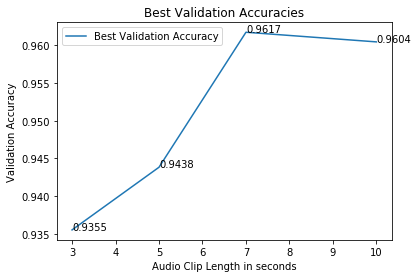

In [68]:
plt.plot(best_val_accs.keys(), best_val_accs.values(), label = 'Best Validation Accuracy')
for i,j in zip(best_val_accs.keys(), best_val_accs.values()):
    plt.annotate(str(np.round(j, 4)),xy=(i,j))
plt.title('Best Validation Accuracies')
plt.xlabel('Audio Clip Length in seconds')
plt.ylabel('Validation Accuracy')
plt.legend()

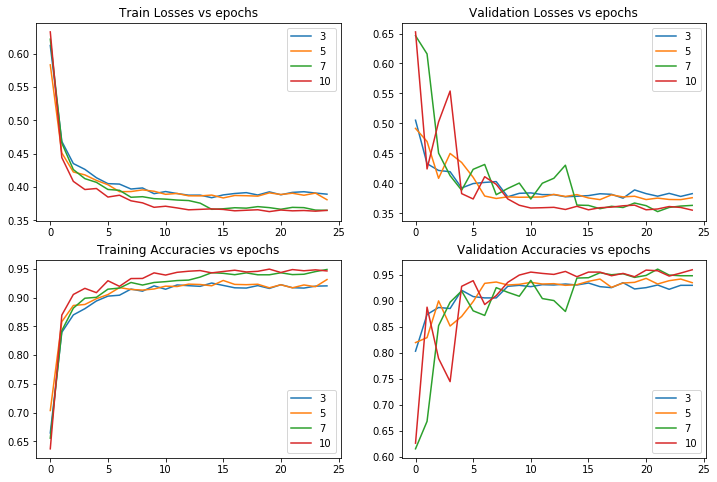

In [60]:
f, axes = plt.subplots(2, 2, figsize = (12, 8))
for num_seconds in num_seconds_list:
    axes[0, 0].plot(loss_dicts[num_seconds]['train'], label = num_seconds)
    axes[0, 1].plot(loss_dicts[num_seconds]['valid'], label = num_seconds)
    axes[1, 0].plot(acc_dicts[num_seconds]['train'], label = num_seconds)
    axes[1, 1].plot(acc_dicts[num_seconds]['valid'], label = num_seconds)
    

axes[0, 0].set_title('Train Losses vs epochs')
axes[0, 1].set_title('Validation Losses vs epochs')
axes[1, 0].set_title('Training Accuracies vs epochs')
axes[1, 1].set_title('Validation Accuracies vs epochs')

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()